In [93]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [95]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Importing Data
data=pd.read_csv("/content/drive/MyDrive/census-income.csv")

In [97]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [99]:
#Null Values
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [100]:
data["annual_income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [101]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [102]:
for i in data.columns:
    print(i,data[i].unique)

age <bound method Series.unique of 0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64>
workclass <bound method Series.unique of 0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object>
fnlwgt <bound method Series.unique of 0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64>
education <bound method Series.unique of 0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
3

In [103]:
data.replace('?', np.nan, inplace=True)

In [104]:
data.isnull().sum().sum()

4262

In [105]:
data.dropna(inplace=True)

In [106]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [107]:
#Duplicates
data.duplicated().sum()

23

In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.duplicated().sum()

0

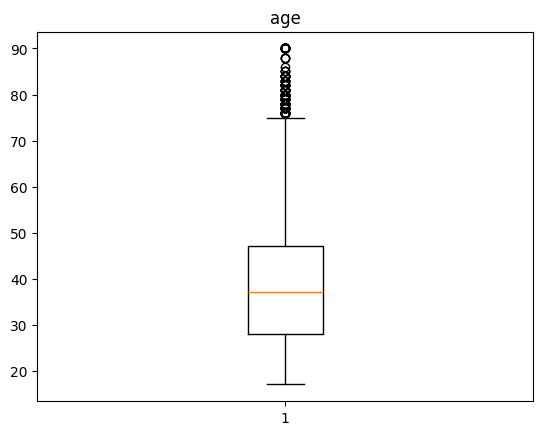

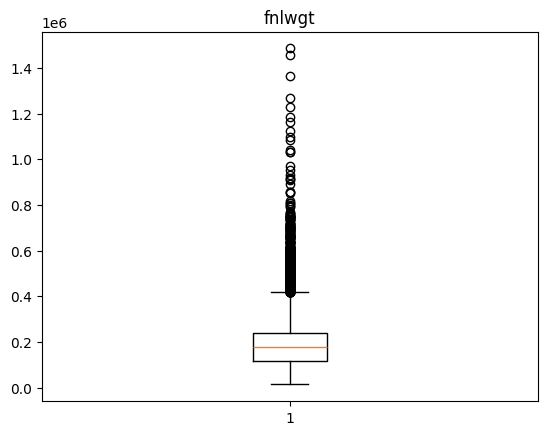

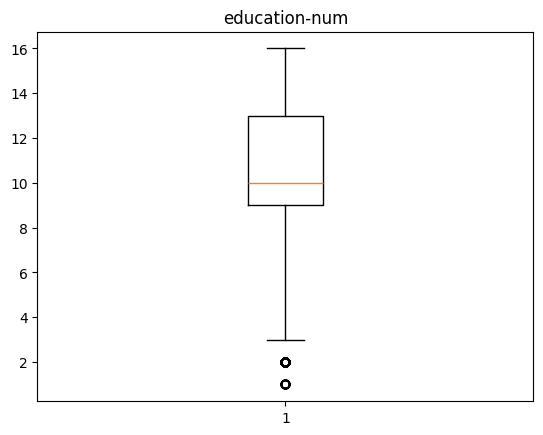

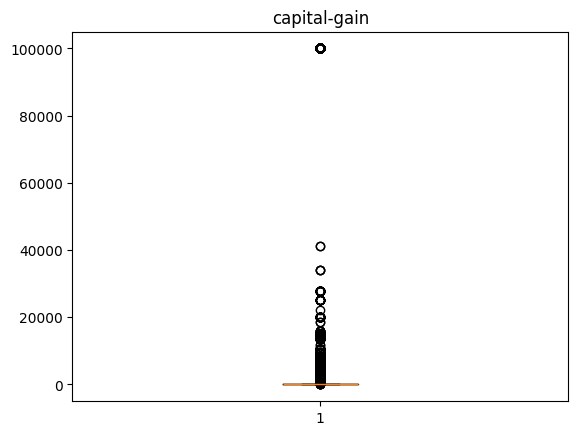

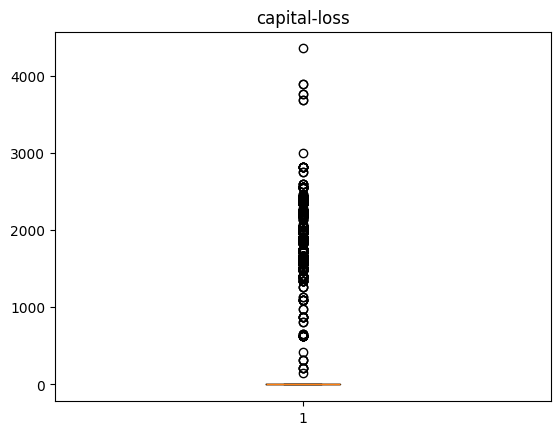

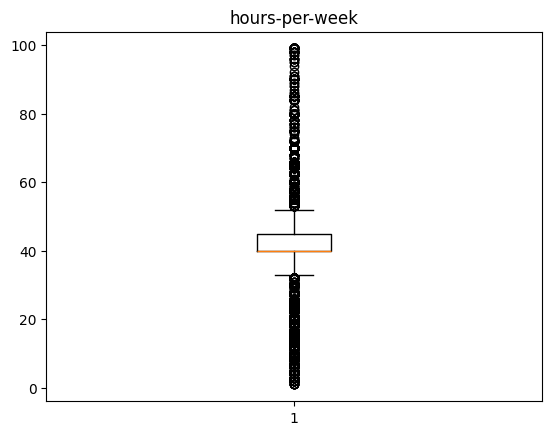

In [110]:
#Outliers
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

In [111]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [112]:
#selecting the columns having outliers
out_cols=["age","fnlwgt","education-num","hours-per-week"]

In [113]:
for col in out_cols:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  UL=Q3+1.5*IQR
  LL=Q1-1.5*IQR
  data=data[(data[col]>=LL) & (data[col]<=UL)]

In [114]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [115]:
# label Encoding
from sklearn.preprocessing import LabelEncoder

In [116]:
le=LabelEncoder()

In [117]:
for col in data.columns:
  if data[col].dtype=="object":
    data[col]=le.fit_transform(data[col])
    print(le.classes_)

['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
['10th' '11th' '12th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm' 'Assoc-voc'
 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Prof-school' 'Some-college']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']
['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
 'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
 'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
 'Ireland' 'Italy' 'J

In [118]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38,0
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38,0
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38,1
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38,0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21317 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             21317 non-null  int64
 1   workclass       21317 non-null  int64
 2   fnlwgt          21317 non-null  int64
 3   education       21317 non-null  int64
 4   education-num   21317 non-null  int64
 5   marital-status  21317 non-null  int64
 6   occupation      21317 non-null  int64
 7   relationship    21317 non-null  int64
 8   race            21317 non-null  int64
 9   sex             21317 non-null  int64
 10  capital-gain    21317 non-null  int64
 11  capital-loss    21317 non-null  int64
 12  hours-per-week  21317 non-null  int64
 13  native-country  21317 non-null  int64
 14  annual_income   21317 non-null  int64
dtypes: int64(15)
memory usage: 2.6 MB


In [120]:
#Correlation
data.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
age,1.000000,0.057171,-0.068164,-0.021440,0.027387,-0.278928,0.003000,-0.203287,0.016766,0.063407,0.085746,0.058164,0.049109,0.004306,0.253098
workclass,0.057171,1.000000,-0.023297,0.005656,0.029408,-0.022645,0.021168,-0.050834,0.043391,0.058314,0.035813,0.003253,0.057127,0.006067,0.008653
fnlwgt,-0.068164,-0.023297,1.000000,-0.020228,-0.030580,0.031711,0.003778,0.003878,-0.007727,0.020208,-0.003939,-0.003618,-0.012271,-0.063895,-0.001092
education,-0.021440,0.005656,-0.020228,1.000000,0.309789,-0.022679,-0.037943,0.011378,0.012932,-0.037181,0.023357,0.012790,0.036194,0.082719,0.067092
education-num,0.027387,0.029408,-0.030580,0.309789,1.000000,-0.020028,0.111304,-0.065103,0.028083,-0.016960,0.107220,0.074143,0.141268,0.059366,0.326164
marital-status,-0.278928,-0.022645,0.031711,-0.022679,-0.020028,1.000000,0.019403,0.139513,-0.076194,-0.080154,-0.033362,-0.028845,-0.081504,-0.026312,-0.163774
occupation,0.003000,0.021168,0.003778,-0.037943,0.111304,0.019403,1.000000,-0.072564,0.002006,0.083023,0.018578,0.019443,0.063933,-0.005582,0.066273
relationship,-0.203287,-0.050834,0.003878,0.011378,-0.065103,0.139513,-0.072564,1.000000,-0.124942,-0.593404,-0.045761,-0.064497,-0.178937,-0.015744,-0.236607
race,0.016766,0.043391,-0.007727,0.012932,0.028083,-0.076194,0.002006,-0.124942,1.000000,0.101900,0.014266,0.023388,0.094108,0.137338,0.073942
sex,0.063407,0.058314,0.020208,-0.037181,-0.016960,-0.080154,0.083023,-0.593404,0.101900,1.000000,0.038296,0.050743,0.179338,0.006012,0.210961


In [121]:
x=data.drop(["annual_income"],axis=1)
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,2,310152,13,10,4,10,1,4,1,0,0,40,38
32556,27,2,257302,6,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,10,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,10,9,6,0,4,4,0,0,0,40,38


In [122]:
y=data[["annual_income"]]
y

,annual_income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


Feature Selection

In [123]:
from sklearn.feature_selection import RFE
rfe=RFE(LogisticRegression(), n_features_to_select=10)
fit = rfe.fit(x,y)

print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Selected Features: [ True  True False  True  True  True False  True  True  True False False
  True  True]
Feature Ranking: [1 1 5 1 1 1 2 1 1 1 4 3 1 1]


In [124]:
#Important columns after feature selection
imp_columns=x.columns[rfe.get_support()]
imp_columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country'],
      dtype='object')

In [125]:
x=x[imp_columns]
x

,age,workclass,education,education-num,marital-status,relationship,race,sex,hours-per-week,native-country
0,39,5,8,13,4,1,4,1,40,38
2,38,2,10,9,0,1,4,1,40,38
3,53,2,1,7,2,0,2,1,40,38
4,28,2,8,13,2,5,2,0,40,4
5,37,2,11,14,2,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32555,22,2,13,10,4,1,4,1,40,38
32556,27,2,6,12,2,5,4,0,38,38
32557,40,2,10,9,2,0,4,1,40,38
32558,58,2,10,9,6,4,4,0,40,38


Training and Testing

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [128]:
x_train

,age,workclass,education,education-num,marital-status,relationship,race,sex,hours-per-week,native-country
11468,56,1,13,10,2,0,4,1,41,38
26298,24,1,8,13,4,3,4,0,50,38
27293,26,4,10,9,2,0,4,1,45,38
1221,48,2,10,9,2,0,4,1,40,38
5101,47,5,11,14,2,0,4,1,47,38
...,...,...,...,...,...,...,...,...,...,...
17183,51,1,10,9,0,1,4,1,40,38
18187,46,2,13,10,3,4,4,0,40,38
8300,25,2,10,9,4,3,4,0,40,38
1332,23,2,10,9,4,1,2,1,35,38


In [129]:
y_train

,annual_income
11468,1
26298,0
27293,0
1221,0
5101,1
...,...
17183,0
18187,0
8300,0
1332,0


In [130]:
x_test

,age,workclass,education,education-num,marital-status,relationship,race,sex,hours-per-week,native-country
16612,24,2,8,13,4,1,4,1,35,38
22475,41,3,8,13,2,0,4,1,35,38
15170,25,2,13,10,4,1,4,1,35,38
10487,27,2,10,9,2,0,4,1,45,38
16904,48,2,0,6,5,3,4,0,48,38
...,...,...,...,...,...,...,...,...,...,...
1052,30,2,8,13,2,0,4,1,40,38
24904,21,2,10,9,4,1,4,0,40,38
7857,30,1,11,14,4,1,4,0,40,38
26263,38,2,1,7,0,4,4,0,40,38


In [131]:
y_test

,annual_income
16612,0
22475,1
15170,0
10487,1
16904,0
...,...
1052,1
24904,0
7857,0
26263,0


Model Building

In [132]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [133]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [134]:
from sklearn.metrics import *

In [135]:
np.round(accuracy_score(y_test,y_pred)*100,2)

77.75

In [136]:
confusion_matrix(y_test,y_pred)

array([[4339,  378],
       [1045,  634]])

<Axes: >

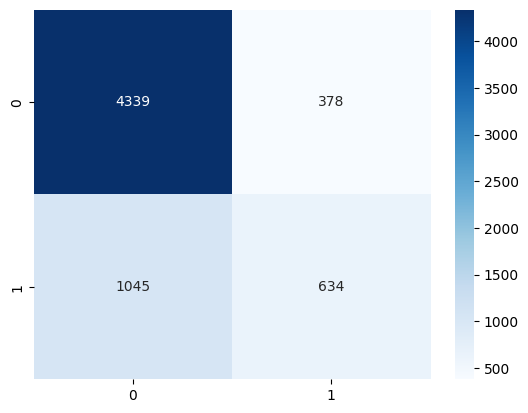

In [137]:
#Heat Map
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d")


#Checking the accuracy of the model using VIF feature selection technique

<Axes: >

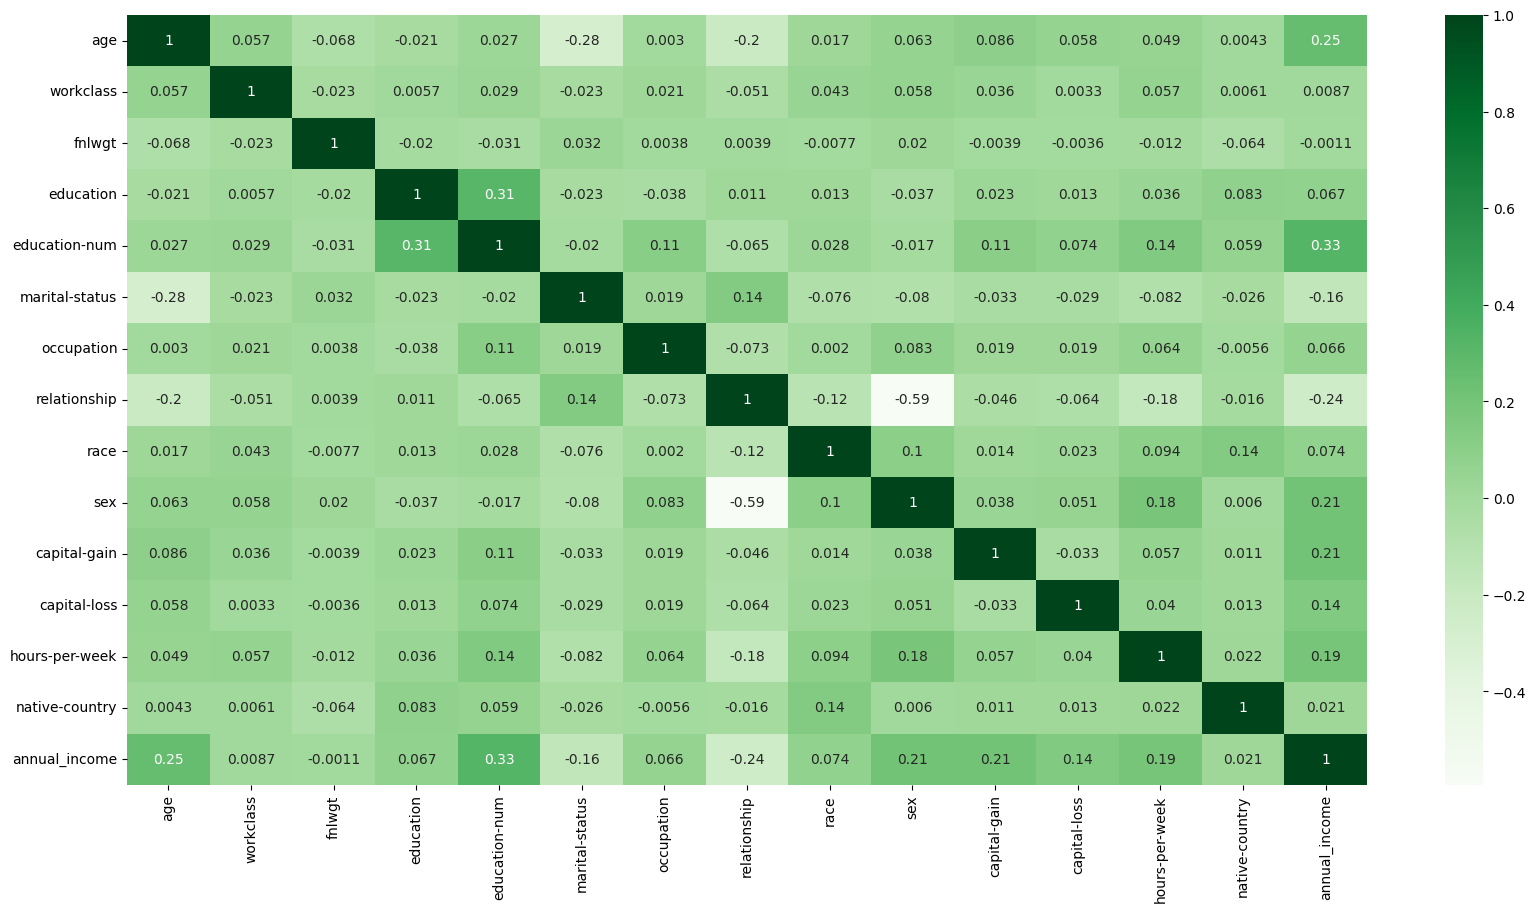

In [138]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="Greens")

In [139]:
#VIF-Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
x

,age,workclass,education,education-num,marital-status,relationship,race,sex,hours-per-week,native-country
0,39,5,8,13,4,1,4,1,40,38
2,38,2,10,9,0,1,4,1,40,38
3,53,2,1,7,2,0,2,1,40,38
4,28,2,8,13,2,5,2,0,40,4
5,37,2,11,14,2,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32555,22,2,13,10,4,1,4,1,40,38
32556,27,2,6,12,2,5,4,0,38,38
32557,40,2,10,9,2,0,4,1,40,38
32558,58,2,10,9,6,4,4,0,40,38


In [141]:
y

,annual_income
0,0
2,0
3,0
4,0
5,0
...,...
32555,0
32556,0
32557,1
32558,0


In [142]:
#Feature Selection
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,11.990479
1,workclass,6.161015
2,education,10.558943
3,education-num,20.792844
4,marital-status,3.898399
5,relationship,2.583317
6,race,19.706787
7,sex,4.995661
8,hours-per-week,60.097046
9,native-country,33.587393


In [143]:
x.drop(["hours-per-week"],axis=1,inplace=True)

In [144]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,10.833756
1,workclass,6.022080
2,education,10.448695
3,education-num,18.626305
4,marital-status,3.775956
5,relationship,2.489222
6,race,17.904814
7,sex,4.627742
8,native-country,28.514342


In [145]:
x.drop(["native-country"],axis=1,inplace=True)

In [146]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,9.960437
1,workclass,5.953145
2,education,10.141609
3,education-num,17.451063
4,marital-status,3.660514
5,relationship,2.372282
6,race,14.974048
7,sex,4.482654


In [147]:
x.drop(["education-num"],axis=1,inplace=True)

In [148]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,9.219384
1,workclass,5.865030
2,education,8.138945
3,marital-status,3.561336
4,relationship,2.355080
5,race,13.760508
6,sex,4.449719


In [149]:
x.drop(["race"],axis=1,inplace=True)

In [150]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,age,7.620647
1,workclass,5.602642
2,education,7.355372
3,marital-status,3.423627
4,relationship,2.268490
5,sex,4.080908


In [151]:
x.drop(["age"],axis=1,inplace=True)

In [152]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,workclass,4.928942
1,education,5.997955
2,marital-status,3.422794
3,relationship,2.227156
4,sex,3.719387


In [153]:
x.drop(["education"],axis=1,inplace=True)

In [154]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["Muticolinearity_value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,features,Muticolinearity_value
0,workclass,4.131629
1,marital-status,3.218608
2,relationship,1.980515
3,sex,3.131418


In [155]:
#Splitting into training and testing
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [156]:
x_train

,workclass,marital-status,relationship,sex
11468,1,2,0,1
26298,1,4,3,0
27293,4,2,0,1
1221,2,2,0,1
5101,5,2,0,1
...,...,...,...,...
17183,1,0,1,1
18187,2,3,4,0
8300,2,4,3,0
1332,2,4,1,1


In [157]:
y_train

,annual_income
11468,1
26298,0
27293,0
1221,0
5101,1
...,...
17183,0
18187,0
8300,0
1332,0


In [158]:
x_test

,workclass,marital-status,relationship,sex
16612,2,4,1,1
22475,3,2,0,1
15170,2,4,1,1
10487,2,2,0,1
16904,2,5,3,0
...,...,...,...,...
1052,2,2,0,1
24904,2,4,1,0
7857,1,4,1,0
26263,2,0,4,0


In [159]:
y_test

,annual_income
16612,0
22475,1
15170,0
10487,1
16904,0
...,...
1052,1
24904,0
7857,0
26263,0


Model Building

In [160]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [161]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [162]:
print(len(y_test))
print(len(y_pred))

6396
6396


In [163]:
#Evaluating the model

In [164]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4717,    0],
       [1679,    0]])

In [165]:
np.round(accuracy_score(y_test,y_pred)*100,2)

73.75

<Axes: >

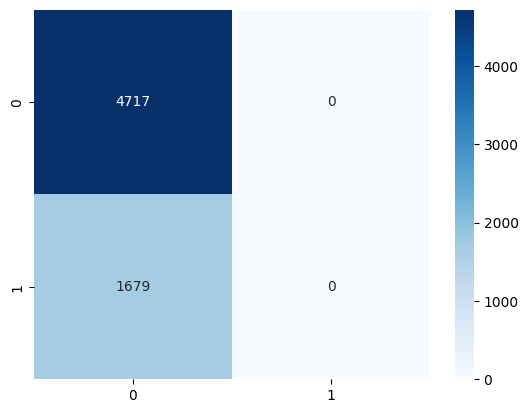

In [166]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d")